<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# 1. Importing Packages

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramod\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2. Loading Data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Classification-Sprint-2307FTDS-Team-JM4/notebook/kamogelo/train.csv?token=GHSAT0AAAAAACKPZ3NUL4L7CGVGLD3K6KIWZLGQDYQ')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Classification-Sprint-2307FTDS-Team-JM4/notebook/kamogelo/test_with_no_labels.csv?token=GHSAT0AAAAAACKPZ3NUAPLUNIM65IRTQTOWZLGQE7Q')
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# 3. Exploratory Data Analysis

In [7]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [8]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [9]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [10]:
df_test.tail()

,message,tweetid
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455
10545,RT @chloebalaoing: climate change is a global ...,470892


In [11]:
df_train.shape

(15819, 3)

In [85]:
df_test.shape

(10546, 2)

In [12]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [18]:
df_test.describe()

,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [17]:
df_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [19]:
df_test.columns

Index(['message', 'tweetid'], dtype='object')

In [20]:
df_train.nunique()

sentiment        4
message      14229
tweetid      15819
dtype: int64

In [21]:
df_test.nunique()

message     9575
tweetid    10546
dtype: int64

# Cleaning the data

In [22]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [23]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [25]:
df_train_numeric = df_train.apply(pd.to_numeric, errors='coerce')
df_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  int64  
 1   message    0 non-null      float64
 2   tweetid    15819 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 370.9 KB


*Relationship Analysis*

In [26]:
corelation = df_train.corr()

C:\Users\ramod\AppData\Local\Temp\ipykernel_19292\2740091155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df_train.corr()


<Axes: >

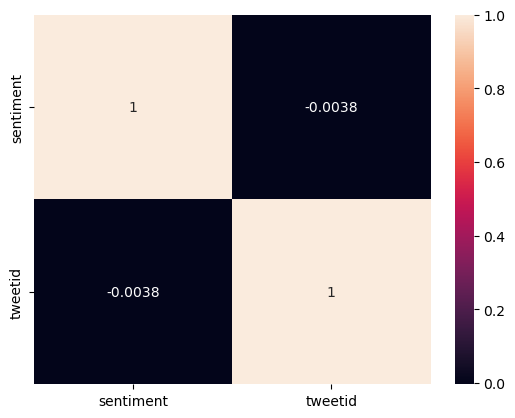

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [28]:
summary_statistics = df_train_numeric.describe()
df_train[summary_statistics].describe()

,sentiment,tweetid
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [29]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [46]:
def remove_punctuation(words):
    words = words.lower()
    return ''.join([x for x in words if x not in string.punctuation])

In [51]:
def find_roots(token_list, n):

    root_dict = {}
    word = token_list[n-1]
    root_dict['original'] = word
    root_dict["stem"] = stemmer.stem(word)
    root_dict["lemma"] = lemmatizer.lemmatize(word)

    return root_dict

PLOTING FEATURES

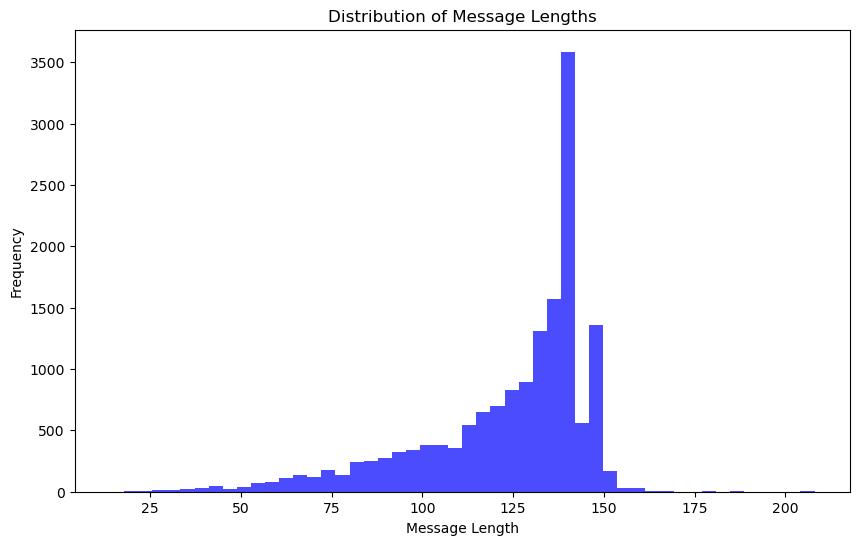

In [16]:

df_train['message_length'] = df_train['message'].apply(len)

# Plot histogram of message lengths
plt.figure(figsize=(10, 6))
plt.hist(df_train['message_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

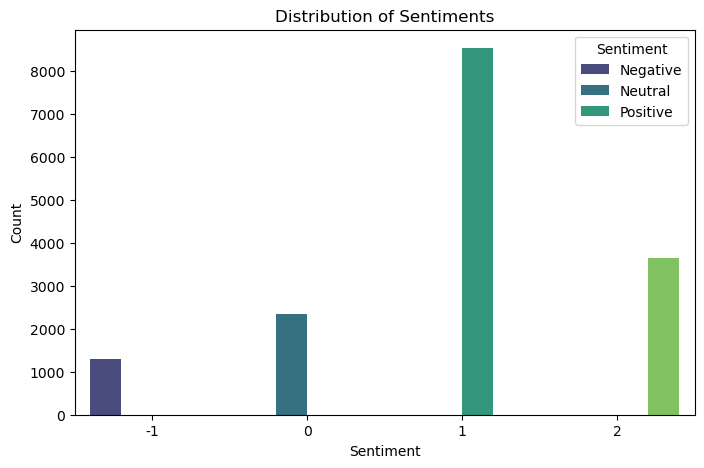

In [106]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df_train, hue='sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.show()

In [58]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

NameError: name 'stopwordlist' is not defined

# 5.Data Engineering

In [19]:
def drop_cols(data):

    data = data[['sentiment', 'message']]

    # Remove duplicate rows
    data = data.drop_duplicates()

    # Split the data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    # Convert text data to numerical features using TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

    X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['message'])
    X_test_tfidf = tfidf_vectorizer.transform(test_data['message'])

    # Optional: If you need to work with the sentiment labels as well
    y_train = train_data['sentiment']
    y_test = test_data['sentiment']

In [20]:
def new_features(data):
    # Assuming you have a different column name for time or no time column at all
    # Modify this line based on your actual data
    if 'time' in data.columns:
        time = pd.to_datetime(data['time'])
        data['time'] = time

        data['Day'] = data['time'].dt.day
        data['month'] = data['time'].dt.month
        data['hour'] = data['time'].dt.hour

        similar_list = ['temp', 'pressure', 'rain', 'wind', 'snow', 'cloud']

        for se in similar_list:
            temp_features = [col for col in data.columns.tolist() if se in col]
            data['av_spain_' + se] = data[temp_features].mean(axis=1)
            data = data.drop(temp_features, axis='columns')

        # Drop time col
        data = data.drop(['time'], axis='columns')

    return data

# Apply the new_features function
df_train = new_features(df_train)
df_test = new_features(df_test)

In [27]:
# Drop the 'message' column from the training data
df_train = df_train.drop('message', axis=1)

# Drop the 'message' column from the test data
df_test = df_test.drop('message', axis=1)

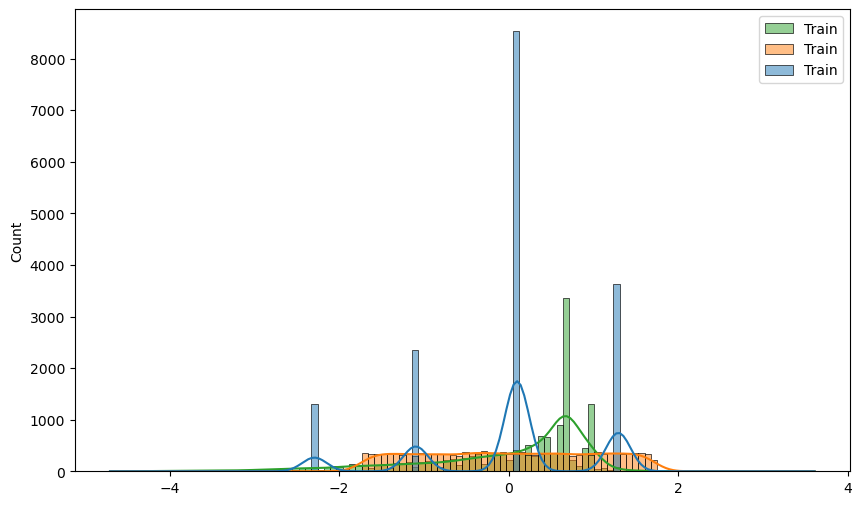

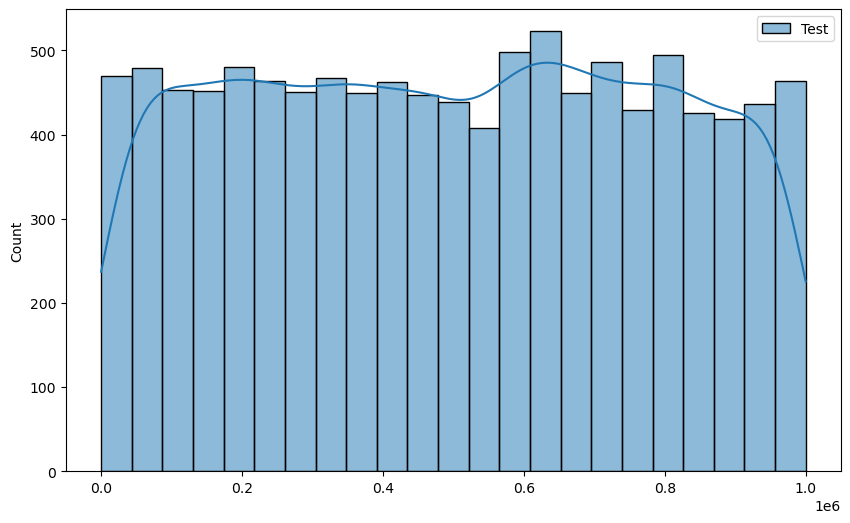

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting distribution for df_train
plt.figure(figsize=(10, 6))
sns.histplot(df_train, kde=True, color='blue', label='Train')
plt.legend()
plt.show()

# Plotting distribution for df_test
plt.figure(figsize=(10, 6))
sns.histplot(df_test, kde=True, color='green', label='Test')
plt.legend()
plt.show()

# 6. Modelling

In [119]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame has columns for features and labels
# Replace 'message' with the actual column name for your features
# Replace 'sentiment' with the actual column name for your labels
X = df_train[['message']]
y = df_train['sentiment']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [126]:
df_train.dropna(subset=['message'], inplace=True)

In [127]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

df_train['processed_message'] = df_train['message'].apply(preprocess_text)

In [129]:
# create one or more ML models
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'message' is the column with text data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['message'])
#simple linear model
lm = LinearRegression()
#lm.fit(X_train['Day'],y_train) #will fit a simple linear model on Day of the month 

#multiple linear model
lm2 = LinearRegression()
lm2.fit(X_train_transformed, y_train) #fit a multiple linear model on all the features and targets

#Ridge regression
from sklearn.linear_model import Ridge

# Ridge regression
rg = Ridge()
rg.fit(X_train_transformed, y_train)

#LASSO model
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls.fit(X_train_transformed, y_train)

#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train_transformed, y_train.values.ravel())

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#support vector machine
sv = sv_reg = SVR(kernel='rbf', gamma='auto')
sv.fit(X_train_transformed, y_train.values.ravel())

#random forest
rf = RandomForestRegressor(n_estimators=80, max_depth=7)
rf.fit(X_train_transformed, y_train.values.ravel())

#ensemble method
models = [("ls",ls),("SVR",sv),("rf",rf)]


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [57]:
lr.fit(df_train, df_test)

ValueError: could not convert string to float: "PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

# 7. Model Perfomance

# 8. Model Explanation